<a href="https://colab.research.google.com/github/LuisHenriqueBertiVeloso/Projetos-de-Analise-de-Dados/blob/main/Treino_de_Como_Limpar_e_Tratos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

In [ ]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.columns = ['ID', 'SCORE', 'ESTADO', 'GENERO', 'IDADE', 'PATRIMONIO', 'SALDO', 'PRODUTOS', 'TemCartCredito', 'ATIVO', 'SALARIO', 'SAIU']

In [ ]:
dataset.head()

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TemCartCredito,ATIVO,SALARIO,SAIU
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              999 non-null    int64  
 1   SCORE           999 non-null    int64  
 2   ESTADO          999 non-null    object 
 3   GENERO          991 non-null    object 
 4   IDADE           999 non-null    int64  
 5   PATRIMONIO      999 non-null    int64  
 6   SALDO           999 non-null    int64  
 7   PRODUTOS        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   ATIVO           999 non-null    int64  
 10  SALARIO         992 non-null    float64
 11  SAIU            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [ ]:
agrupado = dataset.groupby(by='ESTADO').size()
agrupado

ESTADO
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
dataset['ESTADO'].mode()

0    RS
Name: ESTADO, dtype: object

In [ ]:
#no estudo não pode cair estados que não sejam do Sul, precisamos substituir os dados de SP, RP e TD
#no caso podemos substituir os valores usando a moda (para encher valores nulos ou errado, podemos fazer um replace pela moda em dados
#categóricos e mediana nos dados numéricos)

dataset = dataset.replace('SP', 'RS', regex=True)
dataset = dataset.replace('RP', 'RS', regex=True)
dataset = dataset.replace('TD', 'RS', regex=True)

In [ ]:
#dados faltantes na coluna genero - como são poucos dados (999 entradas) não vamos excluir os dados mas fazer uma troca
#um replace pela moda(já que são dados ctegóricos)

In [ ]:
mediana_sal = dataset['SALARIO'].median()
dataset['SALARIO'].fillna(mediana_sal, inplace=True)

In [ ]:
moda_genero = str(dataset['GENERO'].mode()) #dados categoricos ou object - quando foi usar fillna(), transformar em str
dataset['GENERO'].fillna(moda_genero, inplace=True)

In [ ]:
dataset.isnull().sum()

ID                0
SCORE             0
ESTADO            0
GENERO            0
IDADE             0
PATRIMONIO        0
SALDO             0
PRODUTOS          0
TemCartCredito    0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

In [ ]:
agrupado = dataset.groupby(by='ESTADO').size()
agrupado

ESTADO
PR    257
RS    484
SC    258
dtype: int64

<Axes: xlabel='ESTADO'>

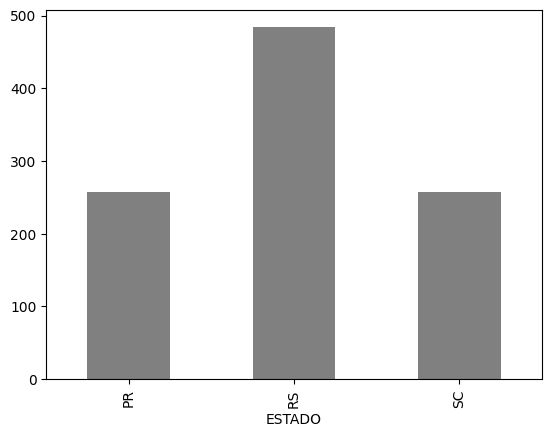

In [ ]:
agrupado.plot.bar(color='gray')

In [ ]:
agrupado_2 = dataset.groupby(by='GENERO').size()
agrupado_2

GENERO
0    Masculino\nName: GENERO, dtype: object      8
F                                                2
Fem                                              1
Feminino                                       461
M                                                6
Masculino                                      521
dtype: int64

In [ ]:
dataset.loc[dataset['GENERO'] == 'M', 'GENERO'] = 'Masculino'
dataset.loc[dataset['GENERO'].isin(['F','Fem']), 'GENERO'] = 'Feminino'

In [ ]:
agrupado_2 = dataset.groupby(by='GENERO').size()
agrupado_2

GENERO
0    Masculino\nName: GENERO, dtype: object      8
Feminino                                       464
Masculino                                      527
dtype: int64

In [ ]:
dataset['SCORE'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: SALDO, dtype: float64

In [ ]:
dataset['IDADE'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: IDADE, dtype: float64

In [ ]:
dataset['SALARIO'].describe()

count    9.990000e+02
mean     3.510134e+07
std      5.287206e+08
min      9.677000e+03
25%      3.078473e+06
50%      8.703250e+06
75%      1.402954e+07
max      1.193469e+10
Name: SALARIO, dtype: float64

In [ ]:
dataset['SALDO'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: SALDO, dtype: float64

Text(0.5, 1.0, 'IDADE')

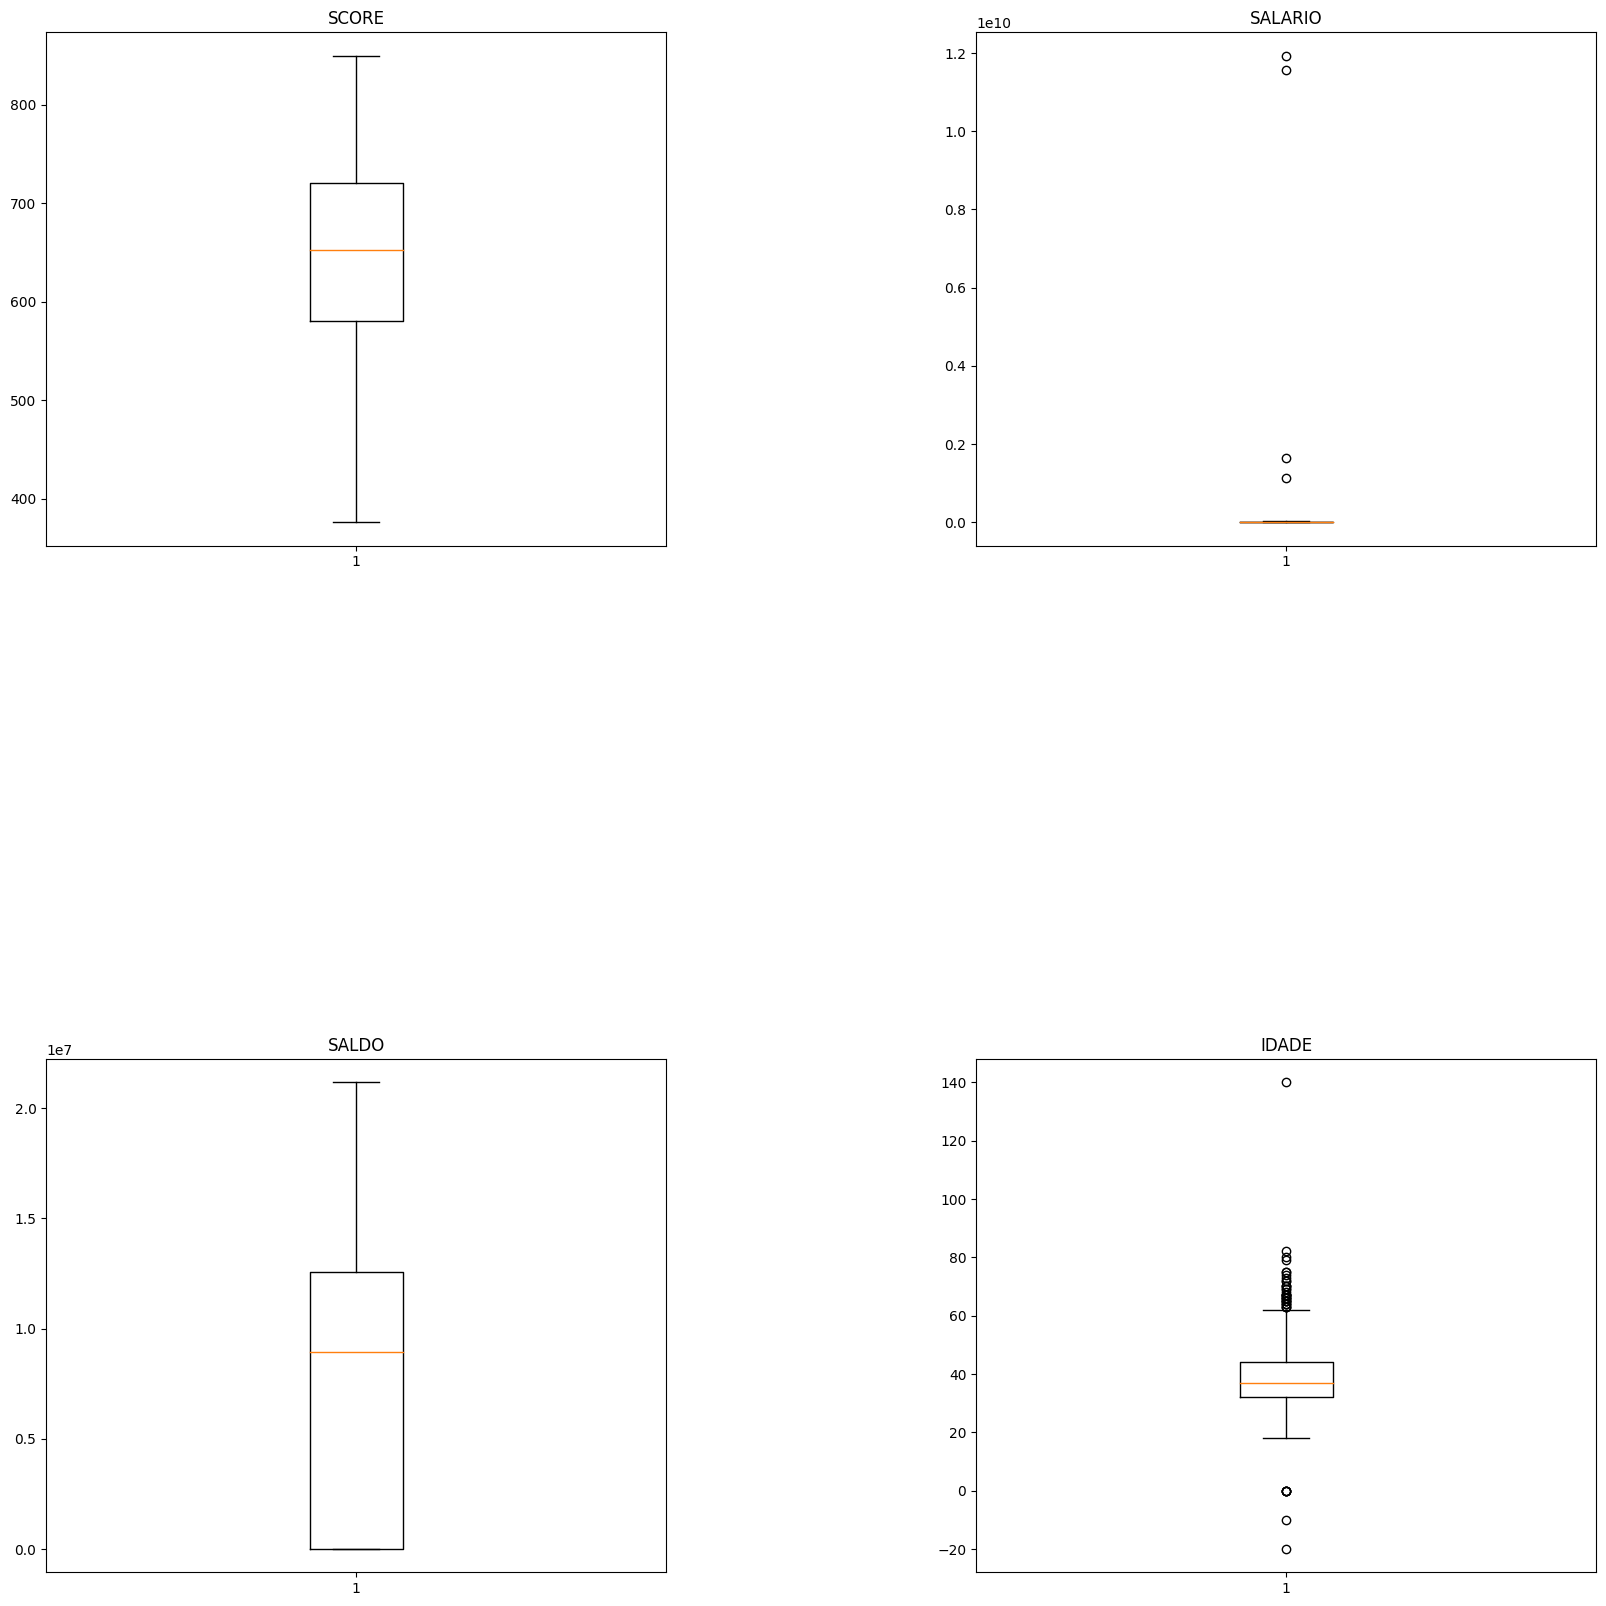

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.subplot(2,2,1)
plt.boxplot(dataset['SCORE']);
plt.title('SCORE')
plt.subplot(2,2,2)
plt.boxplot(dataset['SALARIO']);
plt.title('SALARIO')
plt.subplot(2,2,3)
plt.boxplot(dataset['SALDO']);
plt.title('SALDO')
plt.subplot(2,2,4)
plt.boxplot(dataset['IDADE']);
plt.title('IDADE')

In [ ]:
#para mudar valores fltrados, usar o .loc(data['coluna'] condição valor,'coluna') = valor
mediana = dataset['IDADE'].median()
dataset.loc[(dataset['IDADE'] < 0) | (dataset['IDADE'] > 120),'IDADE'] = mediana

In [ ]:
dataset['ID'].duplicated().sum()

1

In [ ]:
dataset.drop_duplicates(subset='ID', keep='first', inplace=True)

In [ ]:
dataset['ID'].duplicated().sum()

0

In [ ]:
#tirando outliers (considerar 2 desvios padrões da média)
mediana = dataset['SALARIO'].median()
desv = dataset['SALARIO'].std()
dataset.loc[dataset['SALARIO'] >= 2*desv, 'SALARIO'] = mediana